In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_all = pd.read_csv('cleaned_wikidata22.csv')
df = df_all['Python']
df.head()

0    1129
1    1545
2    2196
3    1985
4    2187
Name: Python, dtype: int64

In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [4]:
# Train with Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
model = holt_model.fit(optimized=True)

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 29119.390943516355, MSE: 878711535.2238877, RMSE: 29643.068923846055


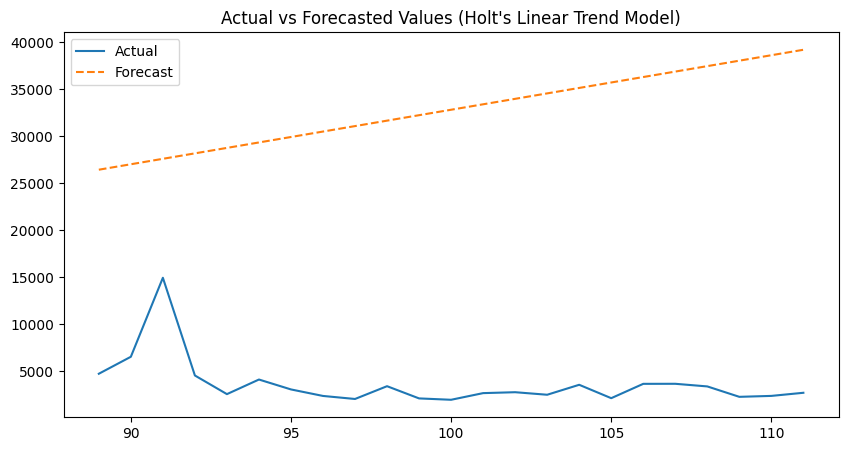

In [5]:

# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Holt's Linear Trend Model)")
plt.show()

In [6]:
languages = list(df_all.columns)
languages.remove('Month')

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in languages:
    df1=df_all[language]
    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
    model = holt_model.fit(optimized=True)

    forecast = model.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_holtwinters.csv',index=False)


MAE: 85.35202568417719, MSE: 9502.949632968783, RMSE: 97.48307357161438
MAE: 328.7990111280821, MSE: 167084.66492652928, RMSE: 408.75991110495323
MAE: 289.7333709687124, MSE: 112799.81749383385, RMSE: 335.8568407727225
MAE: 29119.390943516355, MSE: 878711535.2238877, RMSE: 29643.068923846055
MAE: 692.7934905607727, MSE: 552512.0751258198, RMSE: 743.3115599301681
MAE: 10.772883492951186, MSE: 699.8865378668502, RMSE: 26.45536879098173
MAE: 1128.135051168257, MSE: 2649477.954132435, RMSE: 1627.721706598654


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE: 9908.221043669497, MSE: 104447325.81883621, RMSE: 10219.947446970371
MAE: 52.05589811574049, MSE: 3737.40100113536, RMSE: 61.13428662489945
MAE: 936.7635559335436, MSE: 951358.0881263381, RMSE: 975.3758701784344
MAE: 168.50238306825995, MSE: 162908.06229225988, RMSE: 403.618709046372
MAE: 92.91828092502939, MSE: 50858.7270349728, RMSE: 225.51879530312502
MAE: 21.064770889485672, MSE: 643.7345850754402, RMSE: 25.371925135382224
MAE: 65.27218006336398, MSE: 4526.8981468691245, RMSE: 67.28222757065289
MAE: 47.3909496283549, MSE: 3422.396880851932, RMSE: 58.50125537842698
MAE: 43.30382143122754, MSE: 2821.613657107027, RMSE: 53.11886347717755
MAE: 3169.2187069645083, MSE: 25685175.10329046, RMSE: 5068.0543705933605
MAE: 566.7139230166672, MSE: 986855.2576629184, RMSE: 993.4058876727671
MAE: 876.2388922055643, MSE: 833089.121079206, RMSE: 912.7371588136456
MAE: 73.98969781396592, MSE: 6116.286870677728, RMSE: 78.2066932600895
MAE: 134.46444855901836, MSE: 31640.956316365515, RMSE: 177.

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
